In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fastf1
import fastf1.plotting

In [53]:
print(os.getcwd())
notebook_path = os.path.abspath("test.ipynb")
print(notebook_path)

file = os.path.join(os.getcwd(), "racetrack-database/tracks/Melbourne.csv")
print(file)

/ws
/ws/test.ipynb
/ws/racetrack-database/tracks/Melbourne.csv


In [75]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2024, 'Australia', 'Q')
session.load(weather=False)
verstappen = session.get_driver('VER')
print(f"Pronto {verstappen['FirstName']}?")

fast_ver = session.laps.pick_drivers('LEC').pick_fastest()
ver_car_data = fast_ver.get_car_data()
t = ver_car_data['Time']
vCar = ver_car_data['Speed']
ver_pos_data = fast_ver.get_pos_data()
x_pos = ver_pos_data["X"]/10 + 110
y_pos = ver_pos_data["Y"]/10 + 140

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']


Pronto Max?


/tmp/ipykernel_60/3836730364.py:17: RuntimeWarning: invalid value encountered in divide
  dx /= length
/tmp/ipykernel_60/3836730364.py:18: RuntimeWarning: invalid value encountered in divide
  dy /= length


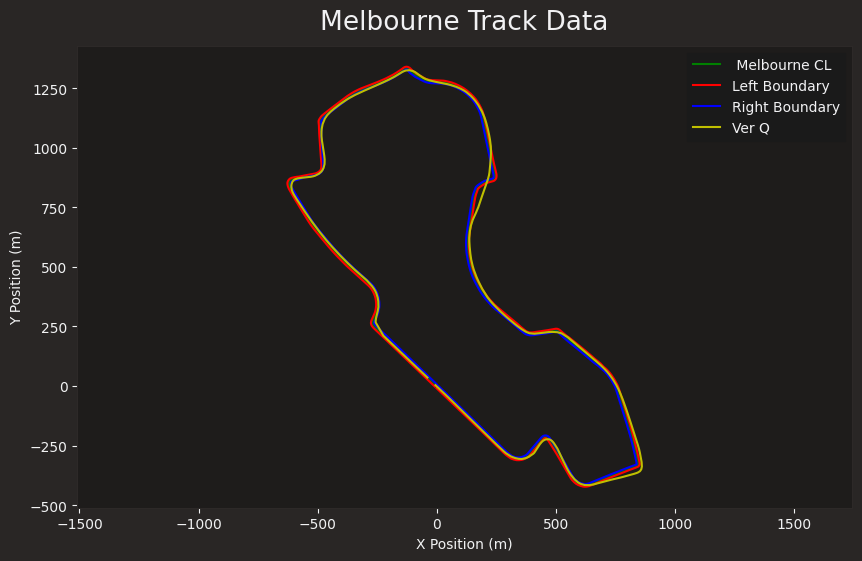

In [78]:
circuit = pd.read_csv(file, encoding='utf-8')
circuit.head(1)
circuit.rename({'# x_m': 'x_m'}, axis=1, inplace=True)
#circuit.info()

#Create the left and right boundaries from the CL and width data
x = circuit["x_m"]
y = circuit["y_m"]
Lw = circuit["w_tr_left_m"]
Rw = circuit["w_tr_right_m"]

# Find the CL direction ?
dx = np.diff(x, prepend=x[0])
dy = np.diff(y, prepend=y[0])
length = np.sqrt(dx**2 + dy**2)
# Normalize to get the unit direction vectors
dx /= length
dy /= length
# Perpendicular vectors
perp_x = -dy
perp_y = dx
# L & R boundary points
circuit["left_x"] = x + perp_x * Lw
circuit["left_y"] = y + perp_y * Lw
circuit["right_x"] = x - perp_x * Rw
circuit["right_y"] = y - perp_y * Rw

# Plot the Melbourne Circuit data
plt.figure(figsize=(10, 6))
plt.plot(circuit["x_m"], circuit["y_m"], 'g-', label=" Melbourne CL")
plt.plot(circuit['left_x'], circuit['left_y'], 'r-', label="Left Boundary")
plt.plot(circuit['right_x'], circuit['right_y'], 'b-', label="Right Boundary")
plt.plot(x_pos, y_pos, 'y-', label="Ver Q")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Melbourne Track Data")
plt.axis("equal")
plt.legend()
#plt.axis([-500, 500, -250, 250])
plt.show()